In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
#import graphviz

In [ ]:
import random

random.seed(10)

In [3]:
df = pd.read_csv('telco.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.drop(["customerID"], axis=1, inplace=True)

In [7]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
#Remove whitespaces for drawing purposes
df['PaymentMethod'].replace(' ', '_', regex=True)

0                Electronic_check
1                    Mailed_check
2                    Mailed_check
3       Bank_transfer_(automatic)
4                Electronic_check
                  ...            
7038                 Mailed_check
7039      Credit_card_(automatic)
7040             Electronic_check
7041                 Mailed_check
7042    Bank_transfer_(automatic)
Name: PaymentMethod, Length: 7043, dtype: object

In [11]:
features = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
for i in features :
    df[i].replace(' ', '_', regex=True, inplace=True)

In [12]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic_check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One_year,No,Mailed_check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,Yes,Yes,No,No,One_year,No,Bank_transfer_(automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,Yes


# Identifying missing data

### One thing unique about XGBoost is to replace missing values as 0

In [17]:
df.dtypes.values == "object"

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [22]:
df.dtypes.loc[df.dtypes.values == "object"].index

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
object_features = np.array(df.dtypes.loc[df.dtypes.values == "object"].index)

In [24]:
object_features

array(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'TotalCharges', 'Churn'], dtype=object)

In [25]:
for i in object_features :
    print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No_phone_service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber_optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One_year' 'Two_year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic_check' 'Mailed_check' 'Bank_transfer_(automatic)'
 'Credit_card_(automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [26]:
#Total Charges is not an object
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [28]:
#If not that many, can set to 0. Otherwise, XGBoost cannot handle it
len(df.loc[df['TotalCharges'] == ' '])

11

In [57]:
df.loc[df['TotalCharges'] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two_year,No,Mailed_check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two_year,No,Mailed_check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two_year,No,Mailed_check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two_year,No,Mailed_check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two_year,No,Mailed_check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One_year,Yes,Mailed_check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,,No


In [30]:
#Set them = 0
df.loc[df['TotalCharges'] == ' ' , 'TotalCharges'] = 0

In [31]:
len(df.loc[df['TotalCharges'] == ' '])

0

In [32]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [34]:
#Replace spaces with _ for everything
#Make sure all non-objects are parsed properly
df.replace(' ', '_', regex=True, inplace=True)

# Format data : Split data into dependent and independent variables

In [35]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [36]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [37]:
#Replace No with 0 and Yes with 1
y = y.map({"No":0, "Yes":1})

In [38]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

# One Hot Encoding for independent variables

In [39]:
X.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object

In [47]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(X[["PaymentMethod", "PaperlessBilling", "TotalCharges"]]).toarray().shape

(7043, 6537)

In [68]:
pd.get_dummies(df, columns = ['PaymentMethod']).head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,Female,0,Yes,No,1,No,No_phone_service,DSL,No,Yes,...,No,Month-to-month,Yes,29.85,29.85,No,0,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,One_year,No,56.95,1889.50,No,0,0,0,1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,Month-to-month,Yes,53.85,108.15,Yes,0,0,0,1
3,Male,0,No,No,45,No,No_phone_service,DSL,Yes,No,...,No,One_year,No,42.30,1840.75,No,1,0,0,0
4,Female,0,No,No,2,Yes,No,Fiber_optic,No,No,...,No,Month-to-month,Yes,70.70,151.65,Yes,0,0,1,0


In [48]:
#Use it on all categorical data
cat_features =np.array(X.dtypes.loc[X.dtypes.values == 'object'].index)
X_encoded = pd.get_dummies(X, columns = cat_features)

In [49]:
X_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank_transfer_(automatic),PaymentMethod_Credit_card_(automatic),PaymentMethod_Electronic_check,PaymentMethod_Mailed_check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [50]:
#Make sure it only contains 1 and 0
y.unique()

array([0, 1], dtype=int64)

# Build a Preliminary XGBoost Model

In [51]:
#Find the proportion of people who left (Churn = Yes = 1)
sum(y) / len(X)

0.2653698707936959

In [52]:
#Since the data is imbalanced, we used stratify
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42, stratify=y)

In [53]:
#The percentage of people who left the company is maintained for both training and test set
sum(y_train) / len(y_train)

0.2654297614539947

In [54]:
print(len(y_train) / len(X)) #75% split

0.7499645037626012


In [55]:
#use log(odds) to calculte probability prediction for classification problems
#missing=None is telling XGBoost what we set our missing values to. 0 represents missing data, can be used as None as it is stored in a sparse matrix
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', missing=None, seed=42)
clf_xgb.fit(X_train, y_train,
            verbose=True,
            early_stopping_rounds=10, #Instead of determining optimal number of trees with CV, we will use early stopping to stop building tress when they no longer improve the situation
            eval_metric='aucpr', #Use AUC as our evaluation criteria
            eval_set = [(X_test, y_test)]) #validate against test set


C:\Users\cmok1\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-aucpr:0.63160
[1]	validation_0-aucpr:0.64538
[2]	validation_0-aucpr:0.64402
[3]	validation_0-aucpr:0.64429
[4]	validation_0-aucpr:0.63866
[5]	validation_0-aucpr:0.63419
[6]	validation_0-aucpr:0.63912
[7]	validation_0-aucpr:0.63787
[8]	validation_0-aucpr:0.63779
[9]	validation_0-aucpr:0.63894
[10]	validation_0-aucpr:0.63680


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

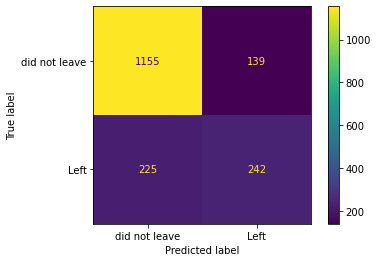

In [56]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels = ['did not leave', 'Left'])

### In the confusion matrix, we see that of the 1294 people that do not leave, 1155 were correctly classified. And of the 467 people that left the company, 242 was correctly classified. Part of the problem is because the data is imbalanced

### Because people leaving costs the company a lot of money, we would like to capture more of the people that left

### XGBost has a parameter, scale_pos_weight, that helps with imbalanced data - increases the penalty if incorrectly classified the minority class

# Optimize Parameters using CV and GridSearch

In [78]:
#Use Grid search CV
#Notes - if imbalanced data, use AUC for overall performance metric
#Balance the positive and negative weights by scale_pos_weight
#In order to speed up the CV, for each tree, we use a random subset
#For each tree, we randomly select the columns

In [232]:
#Round 1

param_grid = {
    'max_depth' : [3, 4, 5], #Tree levels
    'learning_rate' : [0.1, 0.01, 0.05],
    'gamma' : [0, 0.25, 1.0],
    'reg_lambda' : [0, 1.0, 10.0],
    'scale_pos_weight' : [1, 3, 5] #XGBoost recommends sum(negative instances) / sum(positive instances)
}

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic',
                                 seed = 42,
                                 subsample = 0.9, #to speed up
                                 colsample_bytree = 0.5), #prevent overfitting + speed up
    param_grid = param_grid,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3)

optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc' ,
                  eval_set = [(X_test, y_test)],
                  verbose = False)

print(optimal_params.best_params_)

{'gamma': 0, 'learning_rate': 0.05, 'max_depth': 4, 'reg_lambda': 10.0, 'scale_pos_weight': 1}


In [57]:
#Round 2
#If lands on extremes, try other values
param_grid = {
    'max_depth' : [4], #Tree levels
    'learning_rate' : [0.05],
    'gamma' : [0],
    'reg_lambda' : [10.0, 20.0, 100.0],
    'scale_pos_weight' : [0.1, 0.5, 1.0] #XGBoost recommends sum(negative instances) / sum(positive instances)
}

optimal_params = GridSearchCV(
    estimator = xgb.XGBClassifier(objective = 'binary:logistic',
                                 seed = 42,
                                 subsample = 0.9, #to speed up
                                 colsample_bytree = 0.5), #prevent overfitting + speed up
    param_grid = param_grid,
    scoring = 'roc_auc',
    verbose = 0,
    n_jobs = 10,
    cv = 3)

optimal_params.fit(X_train,
                  y_train,
                  early_stopping_rounds = 10,
                  eval_metric = 'auc',
                  eval_set = [(X_test, y_test)],
                  verbose = True)
print(optimal_params.best_params_) 

[0]	validation_0-auc:0.78480
[1]	validation_0-auc:0.82442
[2]	validation_0-auc:0.82520
[3]	validation_0-auc:0.82687
[4]	validation_0-auc:0.82560
[5]	validation_0-auc:0.83090
[6]	validation_0-auc:0.83453
[7]	validation_0-auc:0.83880
[8]	validation_0-auc:0.84036
[9]	validation_0-auc:0.84141
[10]	validation_0-auc:0.84180
[11]	validation_0-auc:0.84199
[12]	validation_0-auc:0.84279
[13]	validation_0-auc:0.84252
[14]	validation_0-auc:0.84309
[15]	validation_0-auc:0.84413


C:\Users\cmok1\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16]	validation_0-auc:0.84413
[17]	validation_0-auc:0.84456
[18]	validation_0-auc:0.84446
[19]	validation_0-auc:0.84445
[20]	validation_0-auc:0.84497
[21]	validation_0-auc:0.84500
[22]	validation_0-auc:0.84458
[23]	validation_0-auc:0.84490
[24]	validation_0-auc:0.84531
[25]	validation_0-auc:0.84506
[26]	validation_0-auc:0.84534
[27]	validation_0-auc:0.84564
[28]	validation_0-auc:0.84562
[29]	validation_0-auc:0.84588
[30]	validation_0-auc:0.84595
[31]	validation_0-auc:0.84604
[32]	validation_0-auc:0.84635
[33]	validation_0-auc:0.84622
[34]	validation_0-auc:0.84636
[35]	validation_0-auc:0.84665
[36]	validation_0-auc:0.84697
[37]	validation_0-auc:0.84712
[38]	validation_0-auc:0.84729
[39]	validation_0-auc:0.84725
[40]	validation_0-auc:0.84757
[41]	validation_0-auc:0.84767
[42]	validation_0-auc:0.84791
[43]	validation_0-auc:0.84806
[44]	validation_0-auc:0.84820
[45]	validation_0-auc:0.84831
[46]	validation_0-auc:0.84827
[47]	validation_0-auc:0.84819
[48]	validation_0-auc:0.84819
[49]	valid

##### So after testing all possible combinations of the potential parameter values with Cross Validation, we see that we should set gamma=0, learn_rate = 0.05, max_depth = 4, reg_lambda = 10

In [61]:
#Build final XGBoost model
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            missing=None, 
                            seed=42,
                            gamma = 0,
                            max_depth = 4,
                            reg_lambda = 10,
                            learning_rate = 0.05,
                            scale_pos_weight = 1.0,
                            colsample_bytree = 0.5
                           )
clf_xgb.fit(X_train, y_train,
            verbose=True,
            early_stopping_rounds=10, #Instead of determining optimal number of trees with CV, we will use early stopping to stop building tress when they no longer improve the situation
            eval_metric=['aucpr', 'error'], #Use AUC as our evaluation criteria
            eval_set = [(X_test, y_test)]) #validate against test set


[0]	validation_0-aucpr:0.51498	validation_0-error:0.23964
[1]	validation_0-aucpr:0.53961	validation_0-error:0.23396
[2]	validation_0-aucpr:0.58308	validation_0-error:0.22260
[3]	validation_0-aucpr:0.59813	validation_0-error:0.21919
[4]	validation_0-aucpr:0.60496	validation_0-error:0.21408
[5]	validation_0-aucpr:0.63278	validation_0-error:0.21522
[6]	validation_0-aucpr:0.63665	validation_0-error:0.20897
[7]	validation_0-aucpr:0.63409	validation_0-error:0.20727
[8]	validation_0-aucpr:0.64091	validation_0-error:0.20443
[9]	validation_0-aucpr:0.64106	validation_0-error:0.20556
[10]	validation_0-aucpr:0.64256	validation_0-error:0.20500
[11]	validation_0-aucpr:0.64389	validation_0-error:0.20500
[12]	validation_0-aucpr:0.64371	validation_0-error:0.20500
[13]	validation_0-aucpr:0.64450	validation_0-error:0.20556
[14]	validation_0-aucpr:0.64585	validation_0-error:0.20556
[15]	validation_0-aucpr:0.64569	validation_0-error:0.20273
[16]	validation_0-aucpr:0.64561	validation_0-error:0.20500
[17]	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=1.0, seed=42,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

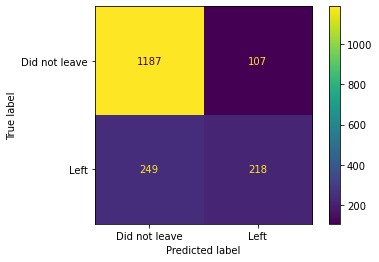

In [80]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not leave', 'Left'])

##### We see that the optimal XGBoost model did worse in classifying people that left the company. Of the 467 people that left the company, 218 left (drop from before. Unusual example, usually should improve at the expense of identifying those who did not leave. Might try oversampling instead of stratify

In [81]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic',
                            missing=None, 
                            seed=42,
                            gamma = 0,
                            max_depth = 4,
                            reg_lambda = 10,
                            learning_rate = 0.05,
                            scale_pos_weight = 1.0,
                            colsample_bytree = 0.5,
                            n_estimators = 1) #Tell XGBoost to build only 1 tree                           )
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=1, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=10, scale_pos_weight=1.0, seed=42, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
conda install graphviz

^C

Note: you may need to restart the kernel to use updated packages.


In [83]:
#Now print out the weight, gain, cover, etc for the tree

#weight = number of times a feature s used in a branch or root across all trees
#gain = average gain across all splits that the feature is used in
#cover = average coverage across all splits a feature is used in
#total_gain = total gain across all splits the feature is used in
#total_cover = the total coverage across all splits the feature is used in
#note - since we only build one tree, total gain = gain and total cover = cover
import graphviz

bst = clf_xgb.get_booster()
for importance_type in ('weight', 'gain', 'cover', 'total_gain', 'total_cover') :
    print('%s: ' % importance_type, bst.get_score(importance_type = importance_type))
    
node_params = {'shape' : 'box', #makes the nodes fancy
              'style' : 'filled, rounder',
              'fillcolor' : '#78cbe'}
leaf_params = {'shape' : 'box',
              'style' : 'filled',
              'fillcolor' : '#e48038'}

xgb.to_graphviz(clf_xgb, num_trees = 0, size = "10,10", #num_trees represent which tree you want to plot, not num of trees
               condition_node_params = node_params,
               leaf_node_params = leaf_params)
    

weight:  {'Contract_Month-to-month': 1, 'MonthlyCharges': 3, 'OnlineBackup_No': 2, 'SeniorCitizen': 1, 'InternetService_DSL': 1}
gain:  {'Contract_Month-to-month': 652.761108, 'MonthlyCharges': 54.26290833733333, 'OnlineBackup_No': 21.7172985, 'SeniorCitizen': 12.2325325, 'InternetService_DSL': 36.9080544}
cover:  {'Contract_Month-to-month': 1320.5, 'MonthlyCharges': 447.4166666666667, 'OnlineBackup_No': 352.5, 'SeniorCitizen': 150.25, 'InternetService_DSL': 420.5}
total_gain:  {'Contract_Month-to-month': 652.761108, 'MonthlyCharges': 162.788725012, 'OnlineBackup_No': 43.434597, 'SeniorCitizen': 12.2325325, 'InternetService_DSL': 36.9080544}
total_cover:  {'Contract_Month-to-month': 1320.5, 'MonthlyCharges': 1342.25, 'OnlineBackup_No': 705.0, 'SeniorCitizen': 150.25, 'InternetService_DSL': 420.5}


ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

Solving environment: ...working... done

# All requested packages already installed.

